In [20]:
# 사용할 데이터의 형태
data_type = '8'      # '1' : summarize X,개별 기사   '2' : summarize X,날짜별 기사
                    # '3' : summarize O,개별 기사   '4' : summarize O,날짜별 기사
normalized = 'done' # 'done' : 데이터 행별 normalize한 데이터     'not' : 데이터 행별 normalize 안한 데이터
erased_word = ''    # 제거된 단어 형태
num_word = '6000'   # 사용할 단어 수

# 돌려볼 모델의 구조
first_layer = 3000   # 모델의 첫 번째 레이어 수
second_layer = 1000  # 모델의 두 번째 레이어 수
ep = 100             # 모델의 에포크 수
ba = 1024            # 모델의 배치 사이즈

In [2]:
# 생성된 training, test의 x,y값을 pickle의 형태로 저장
import pickle
import os
path = os.getcwd()+'/pickles/'
if erased_word != '':
    erased_word = '_'+erased_word
with open(path+data_type+'train_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_x = pickle.load(f)
with open(path+data_type+'train_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train_y = pickle.load(f)
with open(path+data_type+'train2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_x = pickle.load(f)
with open(path+data_type+'train2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    train2_y = pickle.load(f)
with open(path+data_type+'test_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_x = pickle.load(f)
with open(path+data_type+'test_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test_y = pickle.load(f)
with open(path+data_type+'test2_x_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_x = pickle.load(f)
with open(path+data_type+'test2_y_'+str(num_word)+'_'+normalized+erased_word+'.pickle', 'rb') as f:
    test2_y = pickle.load(f)

In [3]:
# numpy 사용하여 float로 바꾸어주는 과정
import numpy as np
x_train = np.asarray(train_x).astype('float32')
y_train = np.asarray(train_y).astype('float32')
x_test = np.asarray(test_x).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [21]:
# DNN 학습 모델
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()
n =len(x_train[0])
model.add(layers.Dense(first_layer,activation='relu'))#실제 쓸 단어갯수

model.add(layers.Dense(second_layer,activation='relu'))

model.add(layers.Dense(3,activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss = losses.categorical_crossentropy,metrics=[metrics.categorical_accuracy])

#hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),callbacks=callbacks,batch_size=ba)
hist = model.fit(x_train,y_train,epochs=ep,validation_data=(x_test,y_test),batch_size=ba)

# 모델의 예측값을 튜플로 반환하는 함수
def predict(x):
    data = np.expand_dims(np.asarray(x).astype('float32'),axis=0)
    result = model.predict(data)
    return tuple(result[0])


Epoch 1/100
10/10 [==============================] - 5s 470ms/step - loss: 1.0952 - categorical_accuracy: 0.3654 - val_loss: 1.0881 - val_categorical_accuracy: 0.3818
Epoch 2/100
10/10 [==============================] - 5s 460ms/step - loss: 1.0738 - categorical_accuracy: 0.3950 - val_loss: 1.0723 - val_categorical_accuracy: 0.4235
Epoch 3/100
10/10 [==============================] - 5s 488ms/step - loss: 1.0665 - categorical_accuracy: 0.4442 - val_loss: 1.0757 - val_categorical_accuracy: 0.3860
Epoch 4/100
10/10 [==============================] - 5s 518ms/step - loss: 1.0308 - categorical_accuracy: 0.4382 - val_loss: 1.0541 - val_categorical_accuracy: 0.4483
Epoch 5/100
10/10 [==============================] - 6s 582ms/step - loss: 1.0058 - categorical_accuracy: 0.4855 - val_loss: 1.0530 - val_categorical_accuracy: 0.4350
Epoch 6/100
10/10 [==============================] - 6s 580ms/step - loss: 0.9714 - categorical_accuracy: 0.5116 - val_loss: 1.0428 - val_categorical_accuracy: 0.455

Epoch 50/100
10/10 [==============================] - 5s 466ms/step - loss: 0.3766 - categorical_accuracy: 0.9146 - val_loss: 1.4855 - val_categorical_accuracy: 0.5167
Epoch 51/100
10/10 [==============================] - 5s 469ms/step - loss: 0.0616 - categorical_accuracy: 0.9832 - val_loss: 1.7381 - val_categorical_accuracy: 0.5182
Epoch 52/100
10/10 [==============================] - 5s 529ms/step - loss: 0.0574 - categorical_accuracy: 0.9795 - val_loss: 2.1221 - val_categorical_accuracy: 0.4958
Epoch 53/100
10/10 [==============================] - 5s 487ms/step - loss: 0.1942 - categorical_accuracy: 0.9197 - val_loss: 1.7346 - val_categorical_accuracy: 0.5224
Epoch 54/100
10/10 [==============================] - 5s 467ms/step - loss: 0.0445 - categorical_accuracy: 0.9853 - val_loss: 2.0080 - val_categorical_accuracy: 0.5184
Epoch 55/100
10/10 [==============================] - 5s 478ms/step - loss: 0.0474 - categorical_accuracy: 0.9808 - val_loss: 3.2556 - val_categorical_accuracy:

Epoch 99/100
10/10 [==============================] - 5s 471ms/step - loss: 0.0253 - categorical_accuracy: 0.9879 - val_loss: 2.3188 - val_categorical_accuracy: 0.5202
Epoch 100/100
10/10 [==============================] - 5s 463ms/step - loss: 0.0244 - categorical_accuracy: 0.9872 - val_loss: 2.4416 - val_categorical_accuracy: 0.5204


In [5]:
# 모든 날짜의 예측값들을 합치기 위한 튜플의 합 함수

def sum_tuple(a,b):
    return (a[0]+b[0],a[1]+b[1],a[2]+b[2])

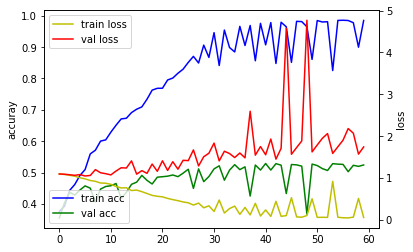

In [18]:
#8
#epoch 60
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

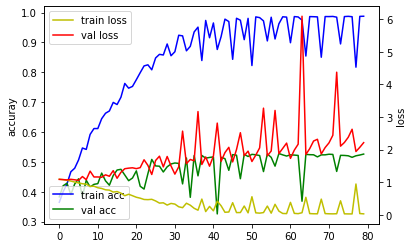

In [11]:
#8
#epoch 80
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

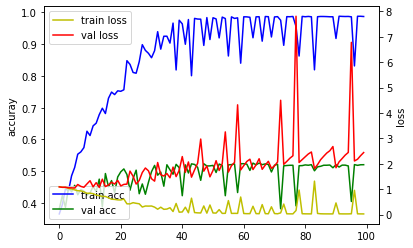

In [22]:
#8
#epoch 100
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [19]:
import re
print('데이터 타입 : '+data_type)
print('단어 갯수 : '+num_word)
print('행당 노말라이즈 : '+ normalized)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)


#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

데이터 타입 : 8
단어 갯수 : 6000
행당 노말라이즈 : done
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  60 , batch_size :  1024
test 데이터 정확도 :  0.8117647058823529


In [12]:
import re
print('데이터 타입 : '+data_type)
print('단어 갯수 : '+num_word)
print('행당 노말라이즈 : '+ normalized)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)


#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

데이터 타입 : 8
단어 갯수 : 6000
행당 노말라이즈 : done
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  80 , batch_size :  1024
test 데이터 정확도 :  0.7623529411764706


In [23]:
import re
print('데이터 타입 : '+data_type)
print('단어 갯수 : '+num_word)
print('행당 노말라이즈 : '+ normalized)
print('모델 레이어 및 노드 수 : ','첫 번째 레이어 - relu,',first_layer,', 두 번째 레이어 - relu,',second_layer)
print('epochs : ',ep,', batch_size : ', ba)

count = 0
sum_dic = {}
for data in test2_x:
    result = predict(data[0])
    if data[1] in sum_dic:
        sum_dic[data[1]] = sum_tuple(sum_dic[data[1]],result)
    else:
        sum_dic[data[1]] = result
    
for date in sum_dic:
    real = test2_y[date]
    value = sum_dic[date].index(max(sum_dic[date]))
    value -= 1
    if real == value:
        count = count + 1
test_score = count / len(sum_dic)


#print('train 데이터 정확도 : ', train_score)
print('test 데이터 정확도 : ', test_score)

데이터 타입 : 8
단어 갯수 : 6000
행당 노말라이즈 : done
모델 레이어 및 노드 수 :  첫 번째 레이어 - relu, 3000 , 두 번째 레이어 - relu, 1000
epochs :  100 , batch_size :  1024
test 데이터 정확도 :  0.7835294117647059
